# 10 class classification model

### Load the data and libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

from keras.models import Sequential
from keras.layers import Conv2D 
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout, Activation
from keras.optimizers import adam
from keras.utils import np_utils

from PIL import Image
from numpy import *

# Sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split



Using TensorFlow backend.


In [2]:
datadir = "E:/INSOFE CLASS NOTES/cute_04/CNN_image classif/10_categories"

categories = ['airplanes', 'BACKGROUND_Google', 'bonsai', 'car_side', 'Faces',
             'Faces_easy', 'grand_piano', 'Leopards', 'Motorbikes', 'watch']

In [3]:
img_size = 50

In [4]:
training_data=[]

def prep_training_data():
    for category in categories:
        path = os.path.join(datadir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (img_size,img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
prep_training_data()        

In [5]:
print(len(training_data))

3725


In [6]:
import random

random.shuffle(training_data)

In [7]:
for sample in training_data[:10]:
    print(sample[1])

4
4
8
3
8
8
0
4
1
8


In [8]:
x = []
y = []

In [9]:
for features, label in training_data:
    x.append(features)
    y.append(label)

x = np.array(x).reshape(-1,img_size, img_size, 1)

In [10]:
x.shape[1:]

(50, 50, 1)

In [11]:
# scaling the data
x = x/255.0

## Basic CNN-model building

In [12]:
# seq model
model = Sequential()

In [13]:
# one conv lay and one max pooling
model.add(Conv2D(64, (3,3), input_shape = x.shape[1:], padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))


# one conv lay and one max pooling
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('sigmoid'))

In [16]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [17]:
history = model.fit(x,y, batch_size = 32, epochs=10, validation_split = 0.25)

Train on 2793 samples, validate on 932 samples
Epoch 1/10
2793/2793 [==============================] - 10s 4ms/step - loss: 1.8297 - acc: 0.4032 - val_loss: 1.0015 - val_acc: 0.7446
Epoch 2/10
2793/2793 [==============================] - 3s 938us/step - loss: 1.0631 - acc: 0.6584 - val_loss: 0.7374 - val_acc: 0.7371
Epoch 3/10
2793/2793 [==============================] - 3s 948us/step - loss: 0.7205 - acc: 0.7719 - val_loss: 0.4034 - val_acc: 0.8830
Epoch 4/10
2793/2793 [==============================] - 3s 954us/step - loss: 0.5684 - acc: 0.8174 - val_loss: 0.3896 - val_acc: 0.8788
Epoch 5/10
2793/2793 [==============================] - 3s 984us/step - loss: 0.4492 - acc: 0.8468 - val_loss: 0.3093 - val_acc: 0.8991
Epoch 6/10
2793/2793 [==============================] - 3s 994us/step - loss: 0.3823 - acc: 0.8768 - val_loss: 0.3068 - val_acc: 0.8970
Epoch 7/10
2793/2793 [==============================] - 3s 984us/step - loss: 0.3588 - acc: 0.8779 - val_loss: 0.3030 - val_acc: 0.9024
Ep

## visualing the accuracy and loss with train and validation

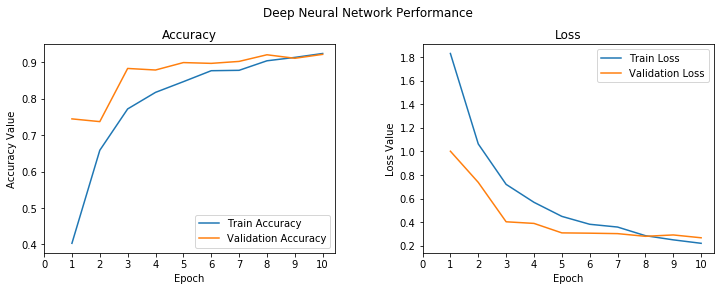

In [18]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Deep Neural Network Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,11))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 11, 1))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 11, 1))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

## tunning the model

In [19]:
# seq model
model = Sequential()

# two conv lay and one max pooling
model.add(Conv2D(64, (3,3), input_shape = x.shape[1:], padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))  
model.add(MaxPooling2D(pool_size = (2,2)))

# two conv lay and one max pooling
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))  
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('sigmoid'))

In [20]:
model.compile(loss ='sparse_categorical_crossentropy',
              metrics = ['accuracy'],optimizer = 'adam')


In [21]:
history = model.fit(x,y, batch_size = 32, epochs=10, validation_split = 0.25)

Train on 2793 samples, validate on 932 samples
Epoch 1/10
2793/2793 [==============================] - 28s 10ms/step - loss: 1.6280 - acc: 0.3802 - val_loss: 0.8237 - val_acc: 0.7221
Epoch 2/10
2793/2793 [==============================] - 25s 9ms/step - loss: 0.6166 - acc: 0.8031 - val_loss: 0.4542 - val_acc: 0.8594
Epoch 3/10
2793/2793 [==============================] - 25s 9ms/step - loss: 0.3316 - acc: 0.8883 - val_loss: 0.3648 - val_acc: 0.8820
Epoch 4/10
2793/2793 [==============================] - 25s 9ms/step - loss: 0.2283 - acc: 0.9202 - val_loss: 0.3834 - val_acc: 0.8938
Epoch 5/10
2793/2793 [==============================] - 25s 9ms/step - loss: 0.1617 - acc: 0.9413 - val_loss: 0.3503 - val_acc: 0.9013
Epoch 6/10
2793/2793 [==============================] - 25s 9ms/step - loss: 0.1245 - acc: 0.9563 - val_loss: 0.3162 - val_acc: 0.9227
Epoch 7/10
2793/2793 [==============================] - 26s 9ms/step - loss: 0.0714 - acc: 0.9796 - val_loss: 0.2993 - val_acc: 0.9217
Epoch 8

## visualing the accuracy and loss with train and validation

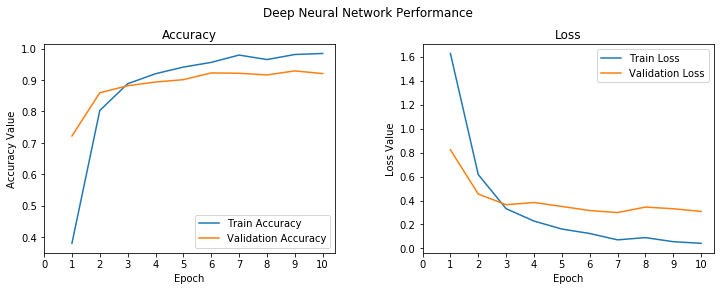

In [22]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Deep Neural Network Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,11))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 11, 1))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 11, 1))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

## predicting the test data

In [32]:
#load the test data
datadir = "E:/INSOFE CLASS NOTES/cute_04/CNN_image classif/10_categories"
categories = ['test_data']
img_size = 50

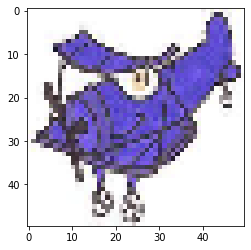

In [33]:
testing_data = []

def testing_data_prep():
    for cat in categories:
        path = os.path.join(datadir,cat)
        #class_num = categories.index(cat)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR)
            new_image = cv2.resize(img_array,(50,50))
            testing_data.append(new_image)
            plt.imshow(new_image,cmap='gray')
            plt.show()
        
testing_data_prep()

In [38]:
test_X = np.array(testing_data).reshape(-1,50,50,1)

In [39]:
test_X.shape

(3, 50, 50, 1)

In [40]:
test_X = test_X/255.0

In [41]:
predictions = model.predict(test_X)

In [42]:
#Final Predictions
predictions

array([[2.05688934e-06, 3.87309283e-01, 2.89293751e-02, 7.14989596e-07,
        2.75887737e-06, 1.35202242e-07, 7.44127647e-07, 2.69642328e-06,
        1.15033423e-08, 1.72750231e-06],
       [9.95210285e-05, 8.42626512e-01, 1.47661371e-02, 3.89079505e-05,
        4.53154003e-04, 6.67129916e-06, 4.25149665e-05, 8.76144390e-04,
        5.59601685e-05, 4.61956224e-05],
       [2.83472291e-12, 9.23320532e-01, 1.29232944e-06, 4.46936307e-11,
        1.29044565e-05, 1.79515486e-10, 1.62961584e-07, 7.22023386e-10,
        2.48695248e-12, 2.63136626e-05]], dtype=float32)

In [43]:
np.amax(predictions[1])

0.8426265

## Pre-Trained Model - InCeptionv3

In [44]:
# Get Inception architecture from keras.applications
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam
import os
# Get Inception architecture from keras.applications
from keras.applications.inception_v3 import InceptionV3

In [45]:
datadir = 'E:/INSOFE CLASS NOTES/cute_04/CNN_image classif/10_categories'   # Path in which DataSet is placed in my local

#Created a list of all the folders present in DataSet to iterate
categories = ['airplanes','BACKGROUND_Google','bonsai','car_side',
              'Faces','Faces_easy','grand_piano','Leopards','Motorbikes','watch']

In [46]:
#Read Training Data with New Size
training_data = []  # Created an empty list to read Training Data(Images)

img_size = 100

def training_data_prep():
    for cat in categories:
        path = os.path.join(datadir,cat)
        class_num = categories.index(cat) #Provide Index to all the categories(0-9).Target Variable
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR) 
                new_image = cv2.resize(img_array,(img_size,img_size)) # Image Resize to 50 * 50
                training_data.append([new_image,class_num])  # Append all the pics to a list with label
            except Exception as e:
                pass
        
training_data_prep()

In [47]:
import random  # Library to shuffle the data as data is in sequence to avoid Overfitting

In [48]:
random.shuffle(training_data) #Shffle Training data to avoid Overfitting

In [49]:
X = []
y = [] # Empty Feature and Label

In [50]:
for features,labels in training_data:
    X.append(features)
    y.append(labels)        # Creating Feature and Label data 

In [51]:
img_size = 100
X = np.array(X).reshape(-1,img_size,img_size,3)   # Reshaping Feature Data to 100 * 100 * 3

In [52]:
#Model Building
def inception_tl(nb_classes, freez_wts=False, learn_rate=0.0001):
    trained_model = InceptionV3(include_top=False,weights='imagenet')
    x = trained_model.output
    x = GlobalAveragePooling2D()(x)
    pred_inception= Dense(nb_classes,activation='softmax')(x)
    model = Model(inputs=trained_model.input,outputs=pred_inception)
    
    for layer in trained_model.layers:
        layer.trainable=(1-freez_wts)
    
    adam = Adam(lr= learn_rate)
    model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer=adam)
    
    return(model)


In [53]:
#Model Compiling
model = inception_tl(nb_classes=10, freez_wts=False)
history = model.fit(X,y,
          validation_split = 0.15,
          batch_size=32,
          epochs=10)

Train on 3166 samples, validate on 559 samples
Epoch 1/10
3166/3166 [==============================] - 112s 35ms/step - loss: 1.1058 - acc: 0.6658 - val_loss: 0.5105 - val_acc: 0.8927
Epoch 2/10
3166/3166 [==============================] - 33s 10ms/step - loss: 0.2656 - acc: 0.9248 - val_loss: 0.2121 - val_acc: 0.9517
Epoch 3/10
3166/3166 [==============================] - 21s 7ms/step - loss: 0.1248 - acc: 0.9675 - val_loss: 0.1650 - val_acc: 0.9517
Epoch 4/10
3166/3166 [==============================] - 21s 7ms/step - loss: 0.0593 - acc: 0.9852 - val_loss: 0.1222 - val_acc: 0.9660
Epoch 5/10
3166/3166 [==============================] - 21s 7ms/step - loss: 0.0488 - acc: 0.9864 - val_loss: 0.1279 - val_acc: 0.9624
Epoch 6/10
3166/3166 [==============================] - 21s 7ms/step - loss: 0.0378 - acc: 0.9915 - val_loss: 0.1193 - val_acc: 0.9696
Epoch 7/10
3166/3166 [==============================] - 21s 7ms/step - loss: 0.0354 - acc: 0.9918 - val_loss: 0.1312 - val_acc: 0.9606
Epoch

# visualing the accuracy and loss with train and validation

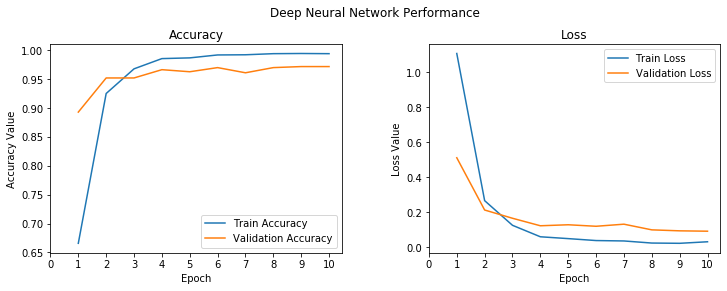

In [54]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Deep Neural Network Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,11))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 11, 1))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 11, 1))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

#### BY pre-trained model of Inceptionv3 got a very good Accuracy of 99.3% thus shows the power of transfer learning techniques.